 Temporary jupyter notebook for benchmarking (content will later be appended to Max_k_cut.ipynb)



In [1]:
from Code.data_processing import *
from Code.Max_k_cut_quantum_functions import *
from Code.Max_k_cut_classical_functions import *
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import minimize
import json

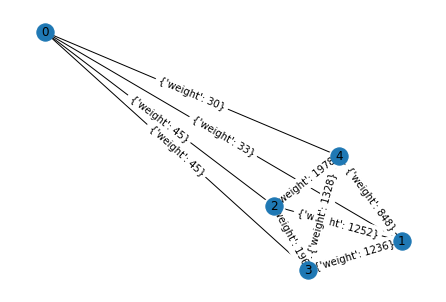

In [2]:
# Generate sample data
n_imp = 3 
n_unimp = 2
G = generate_data(n_unimp, n_imp)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

# Benchmarking

1st params [2.93757558 7.71193881]
1st cost 0.6365686677631568
2nd iteration (EGG), params [ 2.93757558  1.42173827  7.71193881 11.0791768 ]
2nd iteration (EGG),  cost 0.6553984374999998
2nd iteration (Nelder-Mead), params [ 2.89302533  1.43185207  7.62429531 11.43615766]
2nd iteration (Nelder-Mead), cost 0.6619816337719295


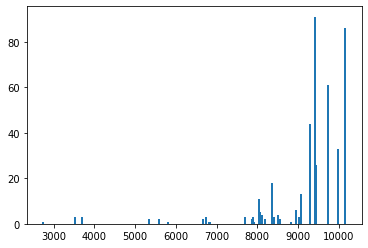

In [3]:
p=2
k=4
C_opt_qaoa, P_opt_qaoa, distribution_qaoa, param_history = qaoa_solver(G,k,p)

In [3]:
C_opt_mc, P_opt_mc = Monte_Carlo_solver(G,k)

NameError: name 'k' is not defined

In [5]:
C_opt, P_opt=brut_force(G,k)

In [6]:
print('C_opt=', C_opt, '      P_opt=', P_opt, '\n')
print('C_opt_mc=', C_opt_mc, '    P_opt_mc=', P_opt_mc, '\n')
print('C_opt_qaoa=', C_opt_qaoa, '  P_opt_qaoa=', P_opt_qaoa, '\n')

C_opt= 10167       P_opt= {'P0': [0, 3], 'P1': [4], 'P2': [2], 'P3': [1]} 

C_opt_mc= 10167     P_opt_mc= {'P0': [2], 'P1': [1], 'P2': [4], 'P3': [0, 3]} 

C_opt_qaoa= 10167   P_opt_qaoa= {'P0': [0, 3], 'P1': [1], 'P2': [2], 'P3': [4]} 



real device ? -> no (one example test run)

qaoa approximation ratio with different N against depth
5 repetition
(x-axis: depth p=1 -> p=5,  y-axis: approximation ratio for N=5,9    k=4)  (include p=6 and p=7, more repetions)

classical approximation ratio vs qaoa approximation ratio for different N

p=3,  N=5,7,9,11 (,13)
(x-axis: N,  y-axis: approximation ratio for N mc and qaoa    k=4)
(evtl p=7, N...)

save data!!! (txt file in each loop): Graph, parameters, distribution_qaoa, ideal cost and Partition of brute force, monte-carlo and qaoa.

In [ ]:
qaoa_benchmark_dict={}

k=4
for p in range(1,6): #later additionally p until p=7
    for N in [5]: #later additionally N in [9]
        for repetition in range(5):
            print(p,N,repetition)
            n_imp = np.random.randint(N+1) 
            n_unimp = N-n_imp
            filename = "p_"+str(p)+"_N_"+str(N)+"_repetition_"+str(repetition)
            graph_name = "graph_"+filename
            data_name = "data_"+filename
            G = generate_data(n_unimp, n_imp, True, graph_name)
            C_opt_qaoa, P_opt_qaoa, distribution_qaoa, param_history = qaoa_solver(G,k,p)
            print(C_opt_qaoa, P_opt_qaoa, distribution_qaoa, param_history)   #change in a way that parameter and distribution_qaoa are returned as well
            C_opt_mc, P_opt_mc =Monte_Carlo_solver(G,k)
            C_opt, P_opt=brut_force(G,k)
            
            key=str(p)+str(N)
            if repetition==0:
                qaoa_benchmark_dict[key]=[[C_opt_qaoa, P_opt_qaoa, C_opt_mc, P_opt_mc, C_opt, P_opt]]
            else:
                qaoa_benchmark_dict[key].append([C_opt_qaoa, P_opt_qaoa, C_opt_mc, P_opt_mc, C_opt, P_opt])
            
            # save data here in format e.g.(Graph, parameters, distribution_qaoa, ideal cost and Partition of brute force, monte-carlo and qaoa.)
            with open("Code/created_data/"+data_name+".json", "wb") as f:
                all_data = {}
                all_data["k"] = k
                all_data["N"] = N
                all_data["repetition"] = repetition
                all_data["n_imp"] = n_imp
                all_data["n_unimp"] = n_unimp
                all_data["C_opt_qaoa"] = C_opt_qaoa
                all_data["P_opt_qaoa"] = P_opt_qaoa
                all_data["C_opt_mc"] = C_opt_mc
                all_data["P_opt_mc"] = P_opt_mc
                all_data["C_opt"] = C_opt
                all_data["P_opt"] = P_opt
                all_data["distribution_qaoa"] = distribution_qaoa
                all_data["param_history"] = param_history
                f.write(json.dumps(all_data).encode("utf-8"))